<a href="https://colab.research.google.com/github/Sagar2004-gr/sticky-notes/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix Movies and TV Shows – EDA Project

#Problem Statement

The entertainment industry is highly competitive, making it important to understand how content is distributed and consumed across different regions and categories. This EDA aims to identify key patterns, trends, and factors within Netflix’s content library by analyzing content type, genres, release years, ratings, duration, and country distribution. The goal is to uncover meaningful insights that help understand Netflix’s content strategy, growth trends, and audience targeting decisions.

#Objectives

* Identify the overall distribution of Movies and TV Shows on Netflix.

* Analyze key features such as genres, ratings, release years, duration, and country-wise content production.

* Discover important patterns, correlations, and trends using EDA techniques.

* Provide actionable insights to better understand Netflix’s content growth and strategic focus.

In [ ]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/netflix_titles.csv')
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

#Data Description

The dataset contains information about Movies and TV Shows available on Netflix, including details such as content type, title, director, cast, country of production, release year, rating, duration, genre, and description. It helps analyze content distribution, growth trends, genre popularity, and rating patterns to better understand Netflix’s content strategy.

---

show_id – Unique identifier assigned to each title.

type – Type of content (Movie or TV Show).

title – Name of the Movie or TV Show.

director – Director of the content.

cast – Main actors and actresses involved in the content.

country – Country where the content was produced.

date_added – Date when the content was added to Netflix.

release_year – Year when the content was originally released.

rating – Age rating category of the content (e.g., TV-MA, PG-13).

duration – Length of the movie (in minutes) or number of seasons (for TV Shows).

listed_in – Genre or category of the content.

description – Short summary describing the content.

In [ ]:
data.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [ ]:
num_data = data.select_dtypes(include=['int64','float64'])
num_data

,release_year
0,2020
1,2021
2,2021
3,2021
4,2021
...,...
8802,2007
8803,2018
8804,2009
8805,2006


In [ ]:
cat_data = data.select_dtypes(include=['object'])
cat_data

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Basic checks

In [ ]:
data.shape

(8807, 12)

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
data.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [ ]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df = cat_data.drop(columns=['show_id'])
for x in df:
  print(f"{x} ---> {df[x].unique()}")
  print()

type ---> ['Movie' 'TV Show']

title ---> ['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands' ... 'Zombieland'
 'Zoom' 'Zubaan']

director ---> ['Kirsten Johnson' nan 'Julien Leclercq' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']

cast ---> [nan
 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng'
 'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera'
 ...
 'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf'
 'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers'
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish

In [ ]:
df = cat_data.drop(columns=['show_id'])
for x in df:
  print(f"{df[x].value_counts()}")
  print()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

title
Zubaan                                 1
Dick Johnson Is Dead                   1
Blood & Water                          1
Ganglands                              1
Jailbirds New Orleans                  1
                                      ..
Bangkok Breaking                       1
Vendetta: Truth, Lies and The Mafia    1
The Starling                           1
The Great British Baking Show          1
Sankofa                                1
Name: count, Length: 8807, dtype: int64

director
Rajiv Chilaka              19
Raúl Campos, Jan Suter     18
Suhas Kadav                16
Marcus Raboy               16
Jay Karas                  14
                           ..
James Brown                 1
Ivona Juka                  1
Mu Chu                      1
Chandra Prakash Dwivedi     1
Majid Al Ansari             1
Name: count, Length: 4528, dtype: int64

cast
David Attenborough                                   

Data Wrangling

In [ ]:
data.drop(columns=['show_id'], inplace=True)

In [ ]:
data['date_added'] = pd.to_datetime(data['date_added'].str.strip(), errors='coerce')

In [ ]:
df['country'] = df['country'].apply(
    lambda x: x.split(',')[0] if pd.notnull(x) else x
)

In [ ]:
data['duration_int'] = data['duration'].str.extract(r'(\d+)').astype(float)

In [ ]:
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

In [ ]:
data

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0
3,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0
4,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,11.0
8803,TV Show,Zombie Dumb,Rajiv Chilaka,David Attenborough,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,7.0
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,11.0
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0


In [ ]:
df['duration_int'] = df['duration'].str.extract(r'(\d+)').astype(float)

In [ ]:
df['type'] = df['type'].astype('category')
df['rating'] = df['rating'].astype('category')


In [ ]:
data['year_added'] = data['year_added'].astype('Int64')
data['month_added'] = data['month_added'].astype('Int64')

In [ ]:
data.dtypes

,0
type,object
title,object
director,object
cast,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
duration,object
listed_in,object


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8807 non-null   object        
 1   title         8807 non-null   object        
 2   director      6173 non-null   object        
 3   cast          7982 non-null   object        
 4   country       7976 non-null   object        
 5   date_added    8797 non-null   datetime64[ns]
 6   release_year  8807 non-null   int64         
 7   rating        8803 non-null   object        
 8   duration      8804 non-null   object        
 9   listed_in     8807 non-null   object        
 10  description   8807 non-null   object        
 11  year_added    8797 non-null   float64       
 12  month_added   8797 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 894.6+ KB


Check for duplicates

In [ ]:
data.duplicated().sum()  #No duplicates

np.int64(0)

Check for missing values

In [ ]:
data.isnull().sum()

,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3
listed_in,0


These are the columns containing missing values

director,
cast,
country,
date_added,
rating,
duration,
year_added,
month_added.

In [ ]:
data.loc[:,'director'].dtype
data.loc[:,'director'].mode()[0]
data.loc[:,'director']=data.loc[:,'director'].fillna(data.loc[:,'director'].mode()[0])
data.loc[:,'director'].isnull().sum()

np.int64(0)

In [ ]:
data.loc[:,'cast'].dtype
data.loc[:,'cast'].mode()[0]
data.loc[:,'cast']=data.loc[:,'cast'].fillna(data.loc[:,'cast'].mode()[0])
data.loc[:,'cast'].isnull().sum()

np.int64(0)

In [ ]:
data.loc[:,'country'].dtype
data.loc[:,'country'].mode()[0]
data.loc[:,'country']=data.loc[:,'country'].fillna(data.loc[:,'country'].mode()[0])
data.loc[:,'country'].isnull().sum()

np.int64(0)

In [ ]:
data.loc[:,'date_added'].dtype
data.loc[:,'date_added'].mode()[0]
data.loc[:,'date_added']=data.loc[:,'date_added'].fillna(data.loc[:,'date_added'].mode()[0])
data.loc[:,'date_added'].isnull().sum()

np.int64(0)

In [ ]:
data.loc[:,'rating'].dtype
data.loc[:,'rating'].mode()[0]
data.loc[:,'rating']=data.loc[:,'rating'].fillna(data.loc[:,'rating'].mode()[0])
data.loc[:,'rating'].isnull().sum()

np.int64(0)

In [ ]:
data.loc[:,'duration'].dtype
data.loc[:,'duration'].mode()[0]
data.loc[:,'duration']=data.loc[:,'duration'].fillna(data.loc[:,'duration'].mode()[0])
data.loc[:,'duration'].isnull().sum()

np.int64(0)

In [ ]:
data.loc[:,'year_added'].dtype
data.loc[:,'year_added'].mode()[0]
data.loc[:,'year_added']=data.loc[:,'year_added'].fillna(data.loc[:,'year_added'].mode()[0])
data.loc[:,'year_added'].isnull().sum()

np.int64(0)

In [ ]:
data.loc[:,'month_added'].dtype
data.loc[:,'month_added'].mode()[0]
data.loc[:,'month_added']=data.loc[:,'month_added'].fillna(data.loc[:,'month_added'].mode()[0])
data.loc[:,'month_added'].isnull().sum()

np.int64(0)

In [ ]:
data.isnull().sum()

,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


# Data Visualization and Analysis

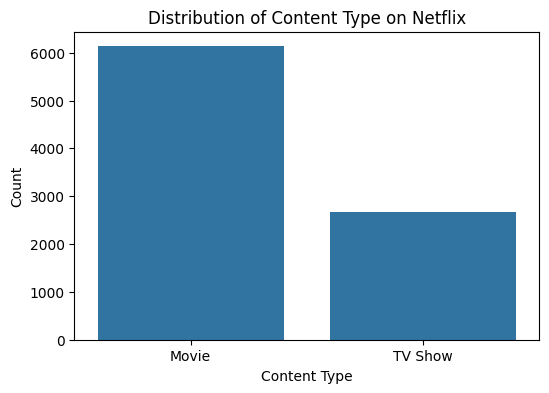

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=data)
plt.title('Distribution of Content Type on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

**Insights**

* Movies Dominate the Platform: A large portion of Netflix’s content consists of Movies, showing that the platform focuses more on film-based content than TV Shows.

* TV Shows Have Smaller Share: The number of TV Shows is significantly lower compared to Movies, indicating that episodic content is less dominant in the overall library.

* Content Strategy Pattern: This distribution suggests that Netflix may prefer Movies because they are quicker to produce and attract a wide range of audiences.

* Opportunity for Growth: Since TV Shows are fewer in number, Netflix has an opportunity to expand high-quality series content to increase long-term viewer engagement.

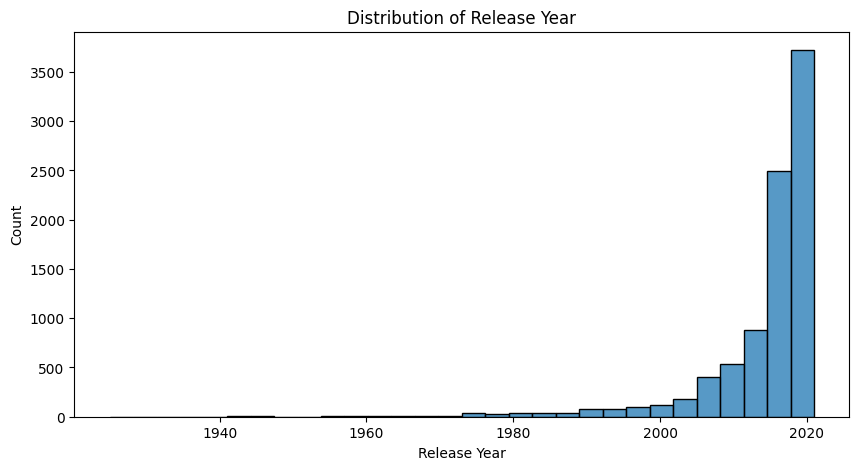

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data['release_year'], bins=30)
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

**Insights**

* More Recent Content: Most titles were released after 2010, showing that Netflix mainly focuses on modern content.

* Peak Between 2015–2020: The highest number of releases happened during this period, indicating strong growth and expansion.

* Fewer Old Titles: Very few movies or shows are from before 2000, suggesting Netflix prioritizes newer content.

* Growth Strategy: The steady increase over the years reflects Netflix’s rapid expansion in content production and acquisition.

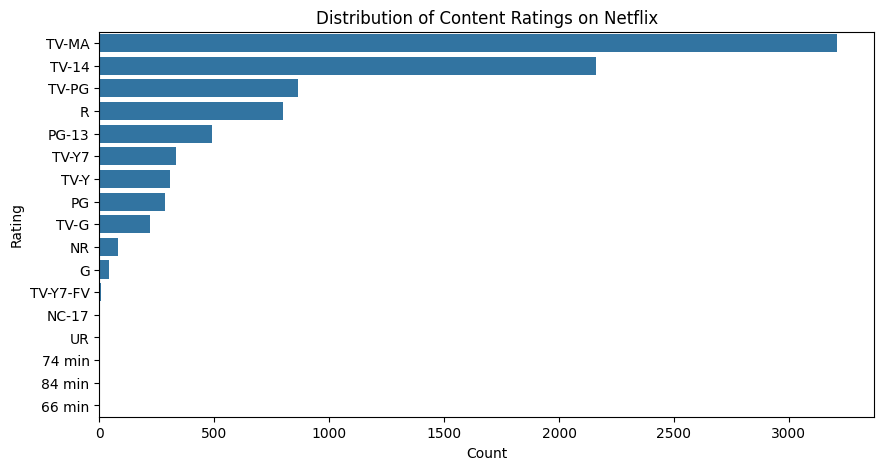

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y='rating', data=data, order=data['rating'].value_counts().index)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

**Insights**

* Adult Content Dominates: TV-MA has the highest count, showing that Netflix mainly offers content suitable for mature audiences.

* Strong Teen Audience Focus: TV-14 is the second highest category, indicating a significant focus on teenage viewers.

* Limited Kids Content: Ratings like TV-Y, TV-G, and G have much lower counts, suggesting fewer titles specifically made for children.

* Platform Target Strategy: Overall, Netflix appears to focus more on adult and young adult audiences rather than family-only or kids-only content.

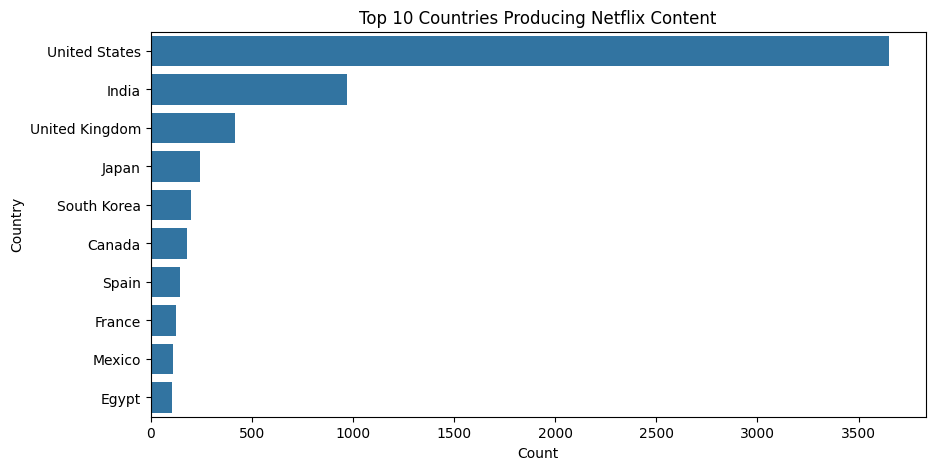

In [ ]:
top_countries = data['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

**Insights**

* United States Dominates: The U.S. produces the highest number of titles, clearly leading Netflix’s content library.

* India is Second: India holds a strong second position, showing high content production and growing market importance.

* Strong Global Mix: The United Kingdom, Japan, South Korea, Canada, and others contribute significantly, indicating Netflix’s global reach.

* Content Concentration: Most Netflix content comes from a few major countries, especially the U.S.

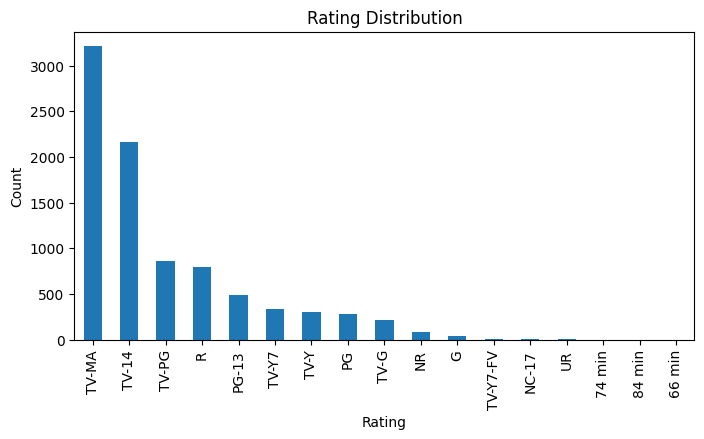

In [ ]:
data['rating'].value_counts().plot(kind='bar', figsize=(8,4))
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**Insights**

* Adult Content Dominates: TV-MA has the highest count, showing that most Netflix content is targeted toward mature audiences.

* Strong Teen Audience Presence: TV-14 is the second most common rating, indicating significant content for teenagers and young adults.

* Limited Kids Content: Ratings like TV-Y and TV-G have much lower counts, suggesting fewer titles specifically designed for children.

* Audience Focus: Overall, Netflix mainly focuses on adult and young adult viewers rather than purely family-friendly content.

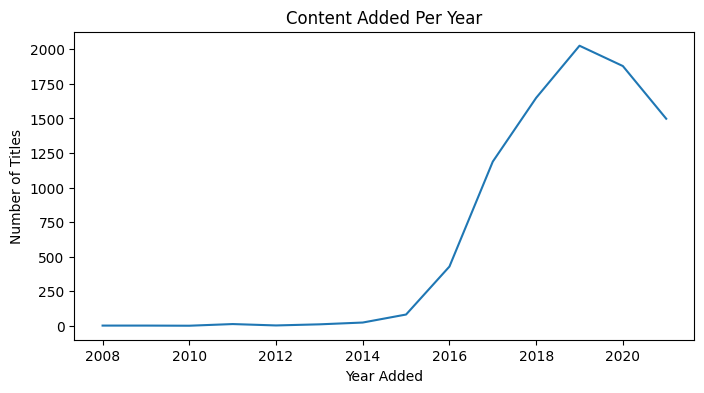

In [ ]:
data['year_added'].value_counts().sort_index().plot(figsize=(8,4))

plt.title('Content Added Per Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.show()

**Insights**

* Rapid Growth After 2015: The number of titles added increased sharply after 2015, showing a major expansion phase for Netflix.

* Peak Around 2019: The highest number of titles was added around 2019, indicating Netflix’s strongest growth period.

* Slight Decline After Peak: After 2019, the number of additions slightly decreased, but still remained high compared to earlier years.

* Expansion Strategy: The sharp rise in content additions reflects Netflix’s aggressive strategy to expand its content library and attract more subscribers

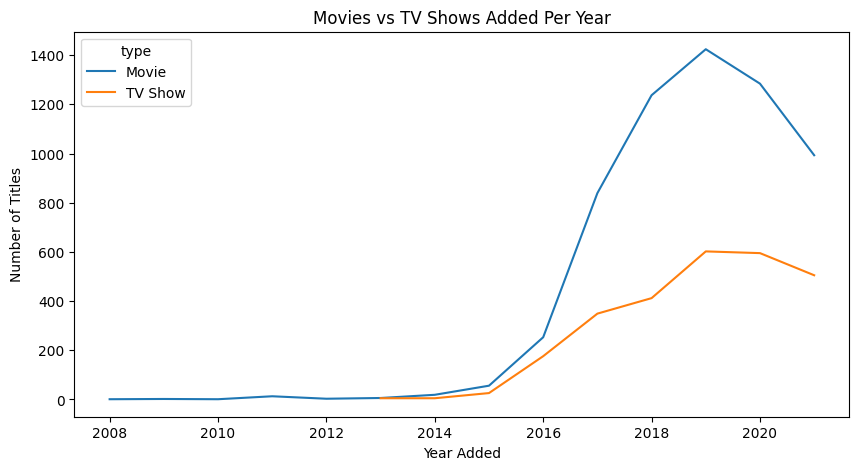

In [ ]:
year_type = data.groupby(['year_added', 'type']).size().unstack()
year_type.plot(figsize=(10,5))
plt.title('Movies vs TV Shows Added Per Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.show()

**Insights**

* Movies Dominate Every Year: Movies were added in higher numbers than TV Shows across all years.

* Rapid Growth After 2015: Both Movies and TV Shows saw a sharp increase after 2015, showing Netflix’s major expansion phase.

* Peak Around 2019: The highest number of both Movies and TV Shows were added around 2019.

* Stronger Focus on Movies: Although TV Shows increased steadily, Netflix consistently added more Movies than TV Shows.

* Slight Decline After Peak: After 2019, additions decreased slightly for both categories, but remained higher than earlier years.

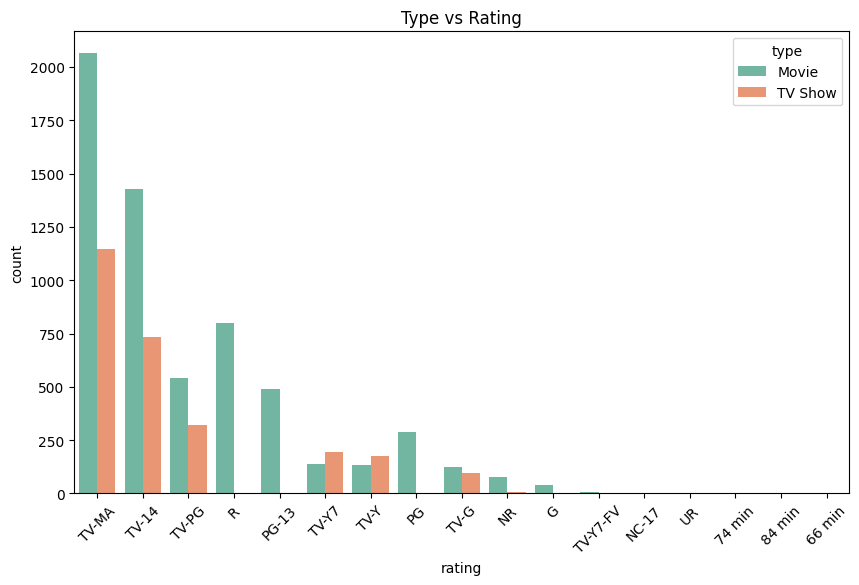

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='rating', hue='type', order=data['rating'].value_counts().index, palette='Set2')
plt.title('Type vs Rating')
plt.xticks(rotation=45)
plt.show()

Insights

* Movies Lead in Most Ratings: Movies have higher counts than TV Shows across almost all rating categories.

* TV-MA Dominates Both Types: TV-MA is the most common rating for both Movies and TV Shows, showing strong focus on mature audiences.

* Teen Content is Significant: TV-14 also has a high count for both types, indicating content targeting teenagers and young adults.

* Limited Kids Content: Ratings like TV-Y and TV-G have much lower counts, meaning Netflix offers comparatively less children-focused content.

* Movies Show Wider Rating Spread: Movies appear in more rating categories compared to TV Shows, suggesting more variety in film content.

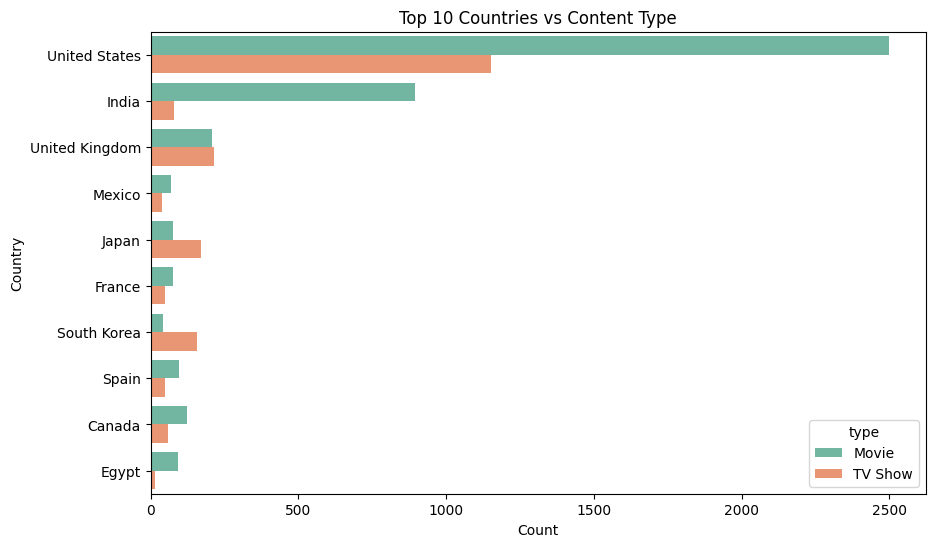

In [ ]:
top10 = data['country'].value_counts().head(10).index
filtered = data[data['country'].isin(top10)]
plt.figure(figsize=(10,6))
sns.countplot(data=filtered,y='country',hue='type',palette='Set2')
plt.title('Top 10 Countries vs Content Type')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

**Insights**

* United States Dominates Both Types: The U.S. produces the highest number of both Movies and TV Shows, clearly leading Netflix’s content production.

* India Focuses More on Movies: India has a high number of Movies compared to TV Shows, indicating stronger film production.

* Balanced Production in Some Countries: Countries like the United Kingdom and Japan show a relatively balanced mix of Movies and TV Shows.

* Movies Lead in Most Countries: In almost all top countries, Movies are more common than TV Shows.

* Global Diversification: Multiple countries contribute significantly, showing Netflix’s strategy of expanding internationally

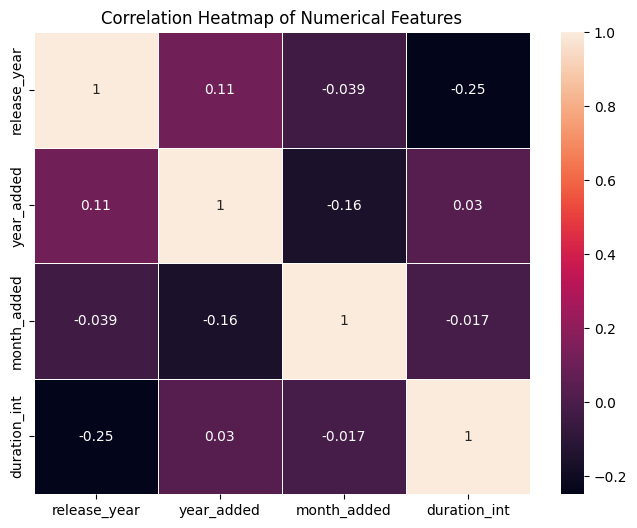

In [ ]:
numeric_cols = ['release_year', 'year_added', 'month_added', 'duration_int']
plt.figure(figsize=(8,6))
sns.heatmap(data[numeric_cols].corr(),annot=True,linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

**Insights**

* Weak Overall Correlation: Most variables show very low correlation values, meaning they are not strongly related to each other.

* Release Year vs Duration: There is a small negative correlation (-0.25) between release year and duration, suggesting newer content may have slightly shorter durations.

* Release Year vs Year Added: A small positive correlation (0.11) indicates that recently released titles are more likely to be added in recent years.

* Month Added Has No Strong Impact: Month added shows almost no correlation with other variables, meaning content addition does not strongly depend on month.

* No Strong Linear Relationships: Overall, there are no strong positive or negative correlations, indicating independent behavior among these numerical features.

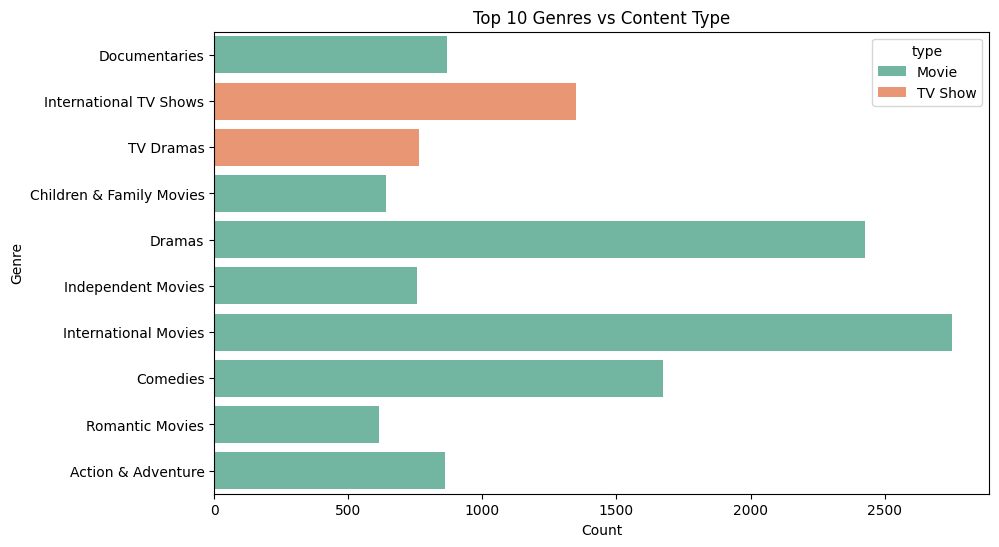

In [ ]:
# Split genres
genre_data = data.copy()
genre_data['listed_in'] = genre_data['listed_in'].str.split(',')
genre_data = genre_data.explode('listed_in')
genre_data['listed_in'] = genre_data['listed_in'].str.strip()
# Top 10 genres
top_genres = genre_data['listed_in'].value_counts().head(10).index
filtered = genre_data[genre_data['listed_in'].isin(top_genres)]

plt.figure(figsize=(10,6))
sns.countplot(data=filtered,y='listed_in',hue='type',palette='Set2')
plt.title('Top 10 Genres vs Content Type')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

**Insights**

* Movies Dominate Most Genres: In most top genres such as International Movies, Dramas, and Comedies, Movies significantly outnumber TV Shows.

* International Content is Strong: International Movies have the highest count, showing Netflix’s strong focus on global content.

* TV Shows Lead in Specific Genres: Genres like International TV Shows and TV Dramas are dominated by TV Shows, as expected.

* Drama is Highly Popular: Drama appears as one of the top genres, indicating strong audience demand for story-driven content.

* Family and Children Content Exists but is Limited: Children & Family Movies are present but not as dominant compared to drama or international categories.

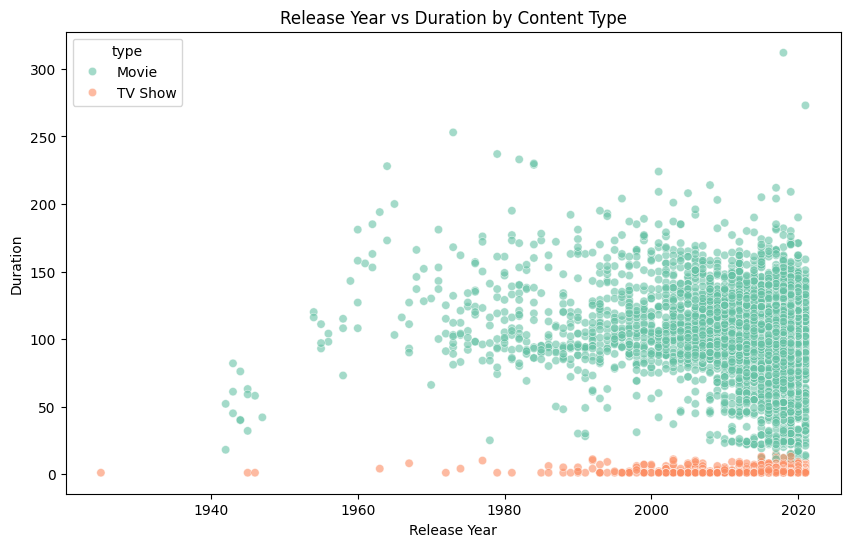

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='release_year', y='duration_int', hue='type', palette='Set2', alpha=0.6)
plt.title('Release Year vs Duration by Content Type')
plt.xlabel('Release Year')
plt.ylabel('Duration')
plt.show()

**Insights**

* Movies Have Higher Duration: Movies generally have longer durations compared to TV Shows.

* TV Shows Show Lower Values: TV Shows are clustered at lower duration values since duration represents number of seasons.

* No Clear Increasing Trend: There is no strong upward or downward trend in duration over the years.

* Wide Variation in Movies: Movie durations vary widely, ranging from short films to very long movies.

* Recent Years Have More Content: Most titles are concentrated after 2000, showing Netflix’s focus on modern content.

/tmp/ipython-input-2943232619.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='month_added',palette='Set3')


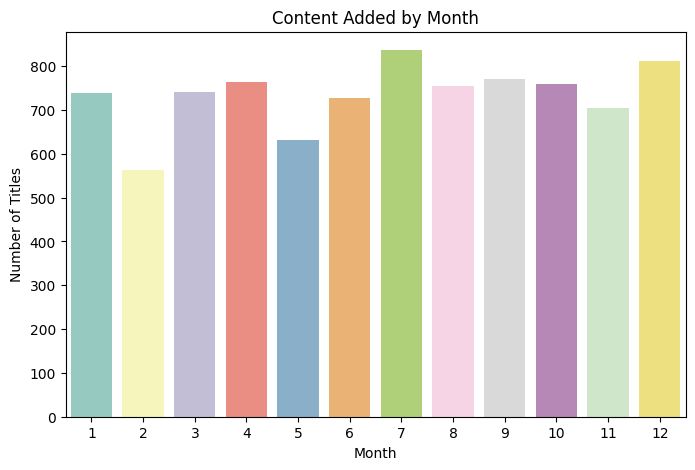

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='month_added',palette='Set3')
plt.title('Content Added by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.show()

**Insights**

* July Has the Highest Additions: Month 7 shows the highest number of titles added, indicating a mid-year content push.

* Strong End-of-Year Activity: December also has high additions, suggesting strategic year-end releases.

* February is the Lowest: Month 2 has comparatively fewer additions.

* Fairly Balanced Distribution: Overall, content is added throughout the year with no extreme seasonal dependency.

* Consistent Release Strategy: Netflix maintains steady monthly additions rather than relying on a single peak season.

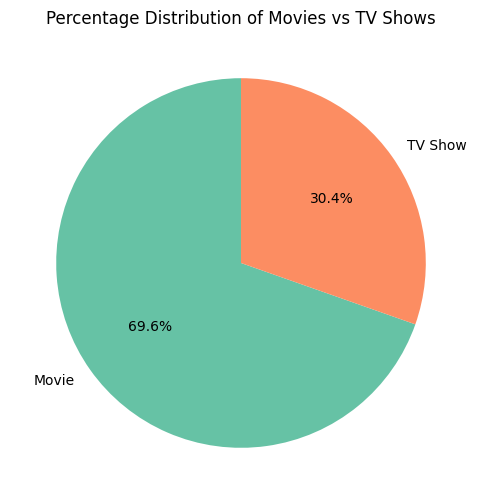

In [ ]:
type_counts = data['type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(type_counts,labels=type_counts.index,autopct='%1.1f%%',colors=['#66c2a5', '#fc8d62'],startangle=90)
plt.title('Percentage Distribution of Movies vs TV Shows')
plt.show()

**Insights**

* Movies Dominate the Platform: Around 69.6% of Netflix content consists of Movies.

* TV Shows Form Smaller Share: TV Shows account for about 30.4% of the total content.

* Film-Focused Strategy: The large share of Movies indicates Netflix heavily focuses on film content compared to episodic series.

* Balanced but Movie-Heavy Library: While TV Shows are significant, the platform is clearly movie-driven in overall composition.

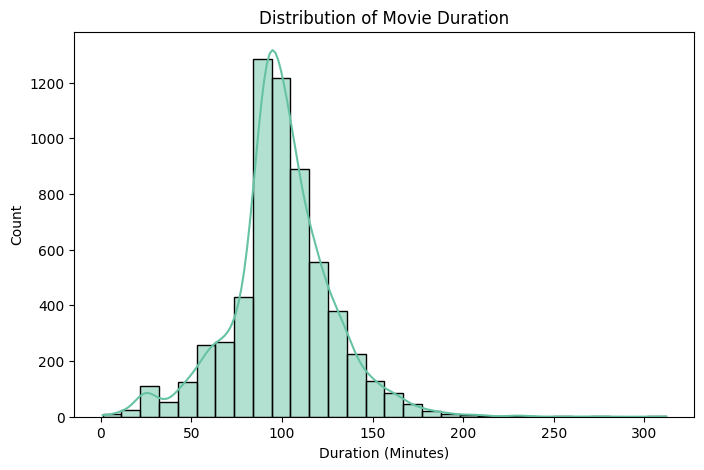

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data[data['type']=='Movie']['duration_int'], bins=30, color='#66c2a5',kde=True)
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Count')
plt.show()

**Insights**

* Most Movies Are Around 90–110 Minutes: The majority of movies cluster around the 1.5 to 2-hour mark, indicating a standard movie length.

* Few Very Short or Very Long Films: There are very few movies under 50 minutes or above 180 minutes, showing extreme durations are uncommon.

* Right-Skewed Distribution: The distribution slightly extends toward longer durations, meaning a small number of movies are significantly longer than average.

* Consistent Industry Standard: The concentration around 100 minutes reflects common industry production patterns for feature films.

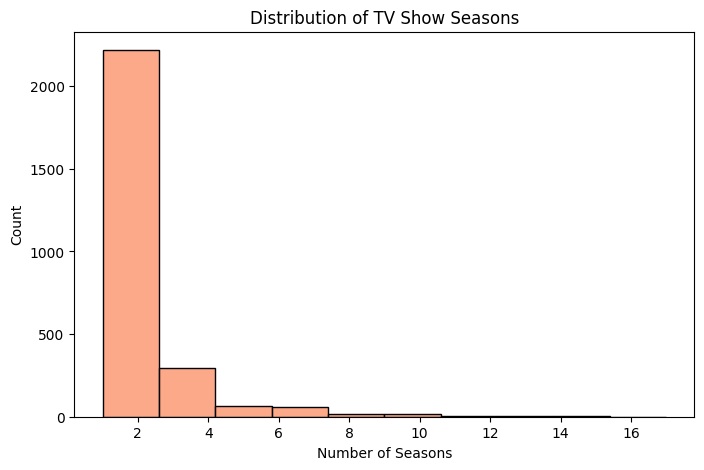

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data[data['type']=='TV Show']['duration_int'], bins=10, color='#fc8d62')
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()

**Insights**

* Most TV Shows Have 1–2 Seasons: The majority of TV Shows are concentrated at lower season counts, especially 1 or 2 seasons.

* Few Long-Running Shows: Very few shows extend beyond 5 seasons, indicating long-running series are uncommon.

* Right-Skewed Distribution: The distribution decreases sharply as the number of seasons increases.

* Short-Series Strategy: This suggests Netflix focuses more on limited or short-series formats rather than very long-running shows.

/tmp/ipython-input-171468981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='Set2')


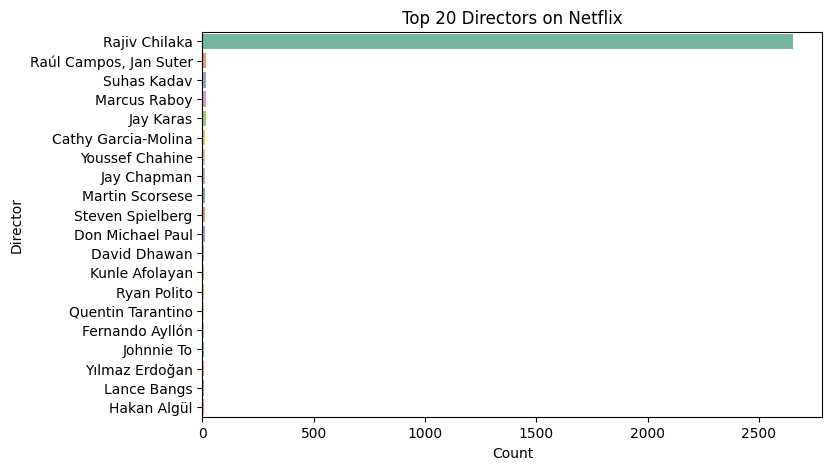

In [ ]:
top_directors = data['director'].value_counts().head(20)
plt.figure(figsize=(8,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Set2')
plt.title('Top 20 Directors on Netflix')
plt.xlabel('Count')
plt.ylabel('Director')
plt.show()

**Insights**

* One Director Dominates Strongly: Rajiv Chilaka has an exceptionally high count compared to others, indicating a large number of titles under the same name (likely children's or animated content).

* Sharp Drop After Top Director: There is a huge gap between the first director and the rest, showing content is not evenly distributed among directors.

* Most Directors Have Limited Titles: Apart from the top one, most directors appear only a few times in the dataset.

* Mix of International Directors: The list includes directors from different regions, reflecting Netflix’s global content acquisition strategy.

* Long-Tail Pattern: The distribution suggests a “long-tail” effect — many directors contribute small numbers of titles rather than a few dominating heavily.

/tmp/ipython-input-1273252831.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cast.values, y=top_cast.index, palette='Set3')


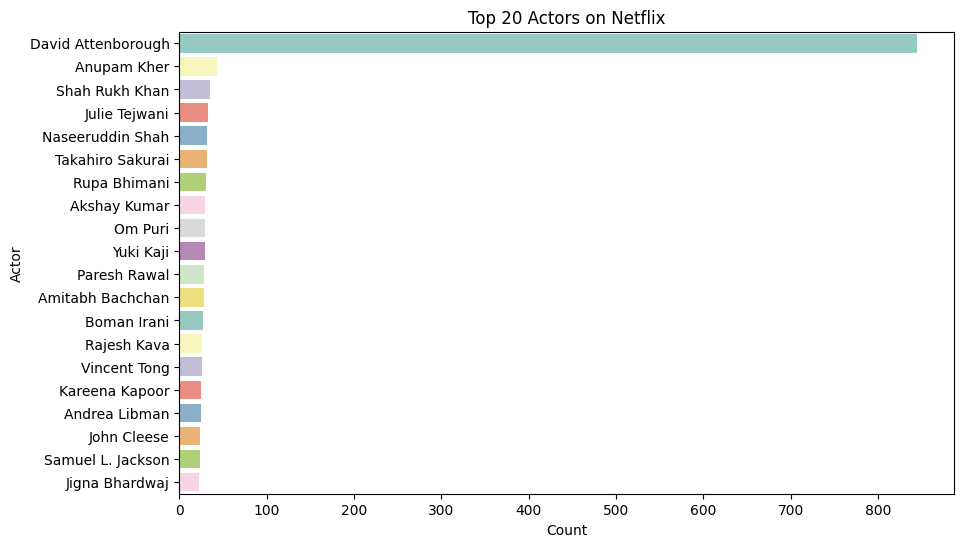

In [ ]:
cast_data = data.copy()
cast_data['cast'] = cast_data['cast'].str.split(',')
cast_data = cast_data.explode('cast')
cast_data['cast'] = cast_data['cast'].str.strip()
top_cast = cast_data['cast'].value_counts().head(20)
plt.figure(figsize=(10,6))
sns.barplot(x=top_cast.values, y=top_cast.index, palette='Set3')
plt.title('Top 20 Actors on Netflix')
plt.xlabel('Count')
plt.ylabel('Actor')
plt.show()

**Insights**

* David Attenborough Dominates: David Attenborough has a significantly higher number of titles compared to others, likely due to multiple documentary narrations.

* Sharp Gap After the Top Actor: There is a large difference between the first actor and the rest, showing content concentration around specific personalities.

* Strong Indian Actor Presence: Several Indian actors such as Anupam Kher, Shah Rukh Khan, Akshay Kumar, and Amitabh Bachchan appear in the top list, reflecting Netflix’s strong Indian market presence.

* Global Representation: The list includes actors from different countries, highlighting Netflix’s international content strategy.

* Long-Tail Pattern: Most actors have relatively similar and smaller counts compared to the top actor, indicating wide content diversity rather than dominance by a few stars

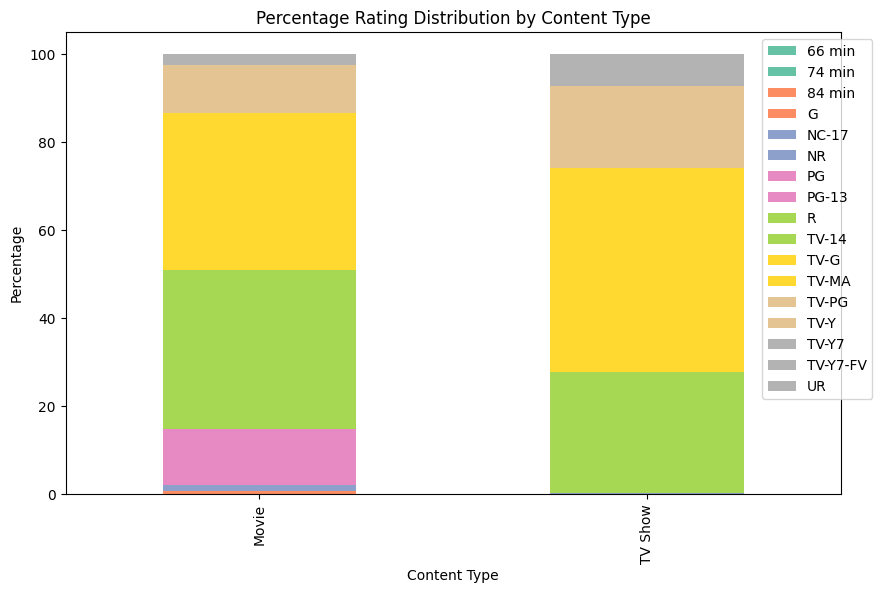

In [ ]:
rating_type = pd.crosstab(data['type'], data['rating'], normalize='index') * 100
rating_type.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title('Percentage Rating Distribution by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

**Insights**

* Adult Content Dominates Both Types: A large percentage of both Movies and TV Shows fall under TV-MA and TV-14, showing strong focus on mature and young adult audiences.

* Movies Have Wider Rating Variety: Movies are distributed across more rating categories (PG, PG-13, R, etc.), indicating broader audience coverage.

* TV Shows Lean Toward TV Ratings: TV Shows are more concentrated in TV-based ratings (TV-MA, TV-14, TV-PG), which is expected for episodic content.

* Limited Kids-Focused Share: Ratings like TV-Y and TV-G occupy a smaller percentage in both categories, suggesting less emphasis on children-only content.

* Audience Strategy Insight: Overall, Netflix prioritizes adult and teen viewers across both Movies and TV Shows.

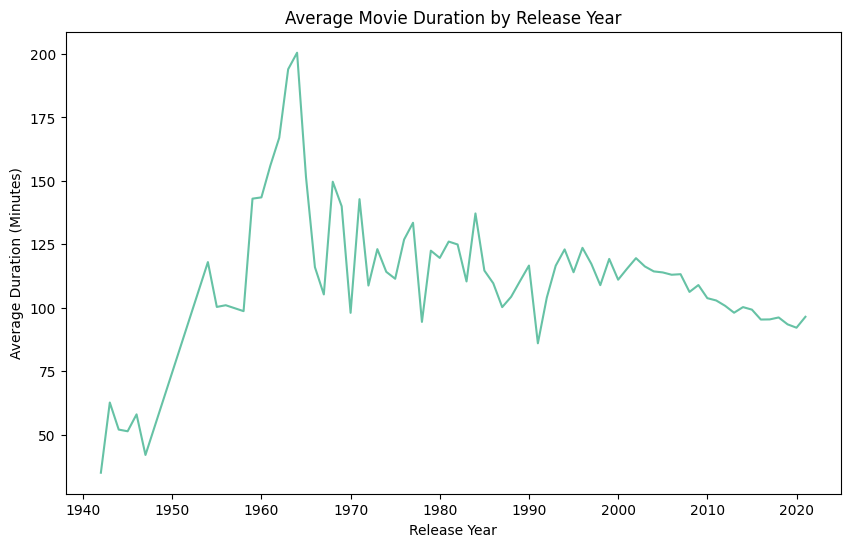

In [ ]:
movies = data[data['type'] == 'Movie']
avg_duration = movies.groupby('release_year')['duration_int'].mean()
plt.figure(figsize=(10,6))
sns.lineplot(x=avg_duration.index, y=avg_duration.values, color='#66c2a5')
plt.title('Average Movie Duration by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (Minutes)')
plt.show()

**Insights**

* Older Movies Were Shorter: In earlier decades (1940s–1950s), average movie duration was generally lower compared to later years.

* Peak Around 1960s: There is a noticeable spike in the 1960s where average duration increased significantly.

* Stabilization After 1980: From the 1980s onward, average movie duration remains relatively stable around 100–120 minutes.

* Slight Decline in Recent Years: In the most recent years, average duration shows a slight downward trend, indicating a shift toward slightly shorter films.

* Industry Standard Around 100–120 Minutes: Overall, modern movies follow a consistent duration pattern near the standard 1.5 to 2-hour format.

#Overall Conclusion

* Around 70% of the content consists of Movies, making Netflix a movie-dominant platform.

* Content additions increased rapidly after 2015, with a peak around 2019, showing an aggressive expansion phase.

* TV-MA and TV-14 ratings dominate, indicating a strong focus on adult and young adult audiences.

* The United States contributes the highest number of titles, followed by India, reflecting global expansion.

* Drama and International content are the most common genres, highlighting strong demand for story-driven and global content.

* Most movies follow the standard 90–120 minute duration, showing consistency in production format.

* TV Shows mostly have 1–2 seasons, suggesting preference for shorter or limited series.

* Content addition is fairly consistent across months, indicating no strong seasonal dependency.

#Key Recommendations

* Increase High-Quality TV Shows: Since Movies dominate the platform, investing more in strong, long-running TV series can improve long-term viewer engagement.

* Expand International Content: Continue strengthening content production in emerging markets like India and other global regions to maintain global growth.

* Diversify Genre Portfolio: While Drama and International genres dominate, expanding underrepresented genres can attract niche audiences.

* Enhance Family & Kids Content: Increasing children-focused content can broaden audience base and improve family subscriptions.

* Maintain Optimal Movie Duration: Continue producing movies within the 90–120 minute range, as it aligns with audience viewing preferences.

* Strategic Year-End Releases: Since higher additions occur mid-year and year-end, continue strategic seasonal content launches.

* Leverage Popular Directors & Actors: Collaborate more with frequently appearing and high-engagement creators to maximize audience retention.